In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
cars=pd.read_csv('car data.csv')
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
cars['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
cars['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


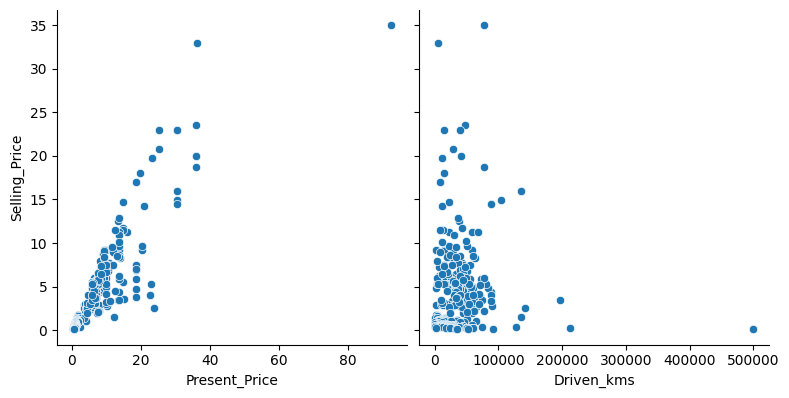

In [7]:
sns.pairplot(cars,x_vars=['Present_Price','Driven_kms'],y_vars='Selling_Price',size=4,aspect=1,kind='scatter')

<ipython-input-9-107bab1c596e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars.corr(), cmap = 'RdBu', annot = True )


<Axes: >

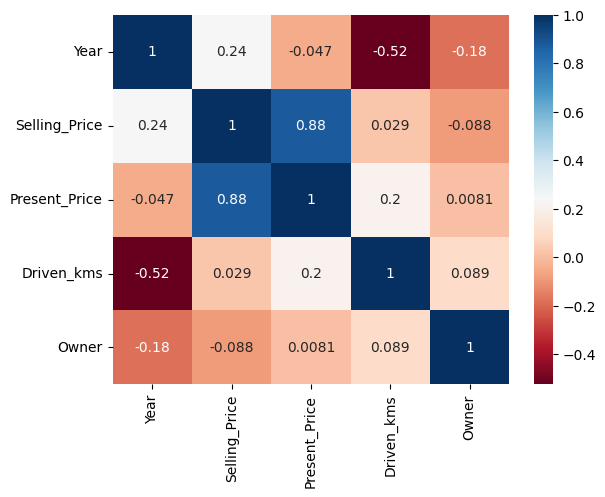

In [9]:
sns.heatmap(cars.corr(), cmap = 'RdBu', annot = True )

In [11]:
X=cars.Present_Price
Y=cars.Selling_Price
x1=X.to_numpy()
y1=Y.to_numpy()
x2=x1.reshape(-1,1)
y2=y1.reshape(-1,1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x2, y2, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [29]:
from sklearn.linear_model import LinearRegression
geek=LinearRegression()

In [30]:
geek.fit(X_train,y_train)

LinearRegression()

In [31]:
print(geek.intercept_)
print(geek.coef_)

[0.8486501]
[[0.48169727]]


In [38]:
y_pred=geek.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)
print(score)
print(mse)

2.6432197732527016
0.7321983460522562
6.986610769714063


<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

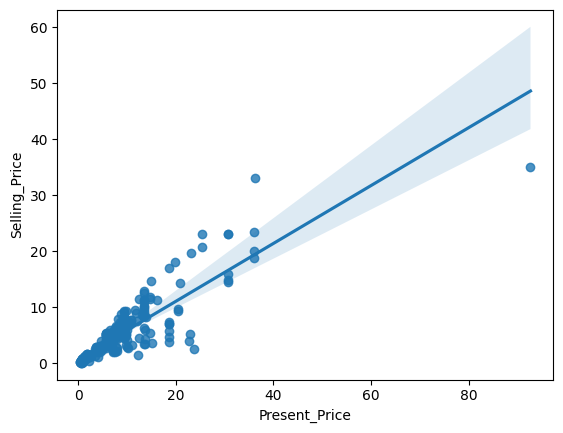

In [49]:
sns.regplot(x=cars['Present_Price'],y=cars['Selling_Price'])